#### Importing Required Library

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten 
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model
from matplotlib import pyplot
import matplotlib.pyplot as plt
from numpy import unique, argmax 
%matplotlib inline


In [ ]:
# Loading datasets from Keras dataset.
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1],x_train.shape[2],1))
x_test = x_test.reshape ((x_test.shape[0], x_test.shape[1],x_test.shape[2],1))

In [ ]:
# Noramalizing the values of pixels of images
x_train, x_test = x_train.astype('float32')/255.0, x_test.astype('float32')/255.0

In [ ]:
# Shape
print (x_train.shape)
print (x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


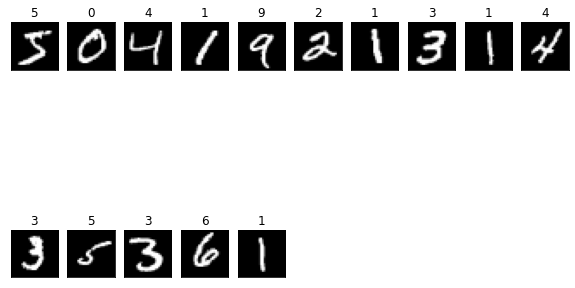

In [ ]:
# Plotting the first 15 images
fig = plt.figure(figsize=(10,7))
for i in range(15):
  ax = fig.add_subplot(2,10,i+1,xticks = [],yticks = [])
  ax.imshow(np.squeeze(x_train[i]), cmap = 'gray')
  ax.set_title(y_train[i])


In [ ]:
# Checking the shape of single image.
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


#### Building Model

In [ ]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation = 'relu',input_shape = img_shape))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(48,(3,3),activation = 'relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [ ]:
# Checking the summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 48)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 48)          0         
                                                                 
 flatten (Flatten)           (None, 1200)              0

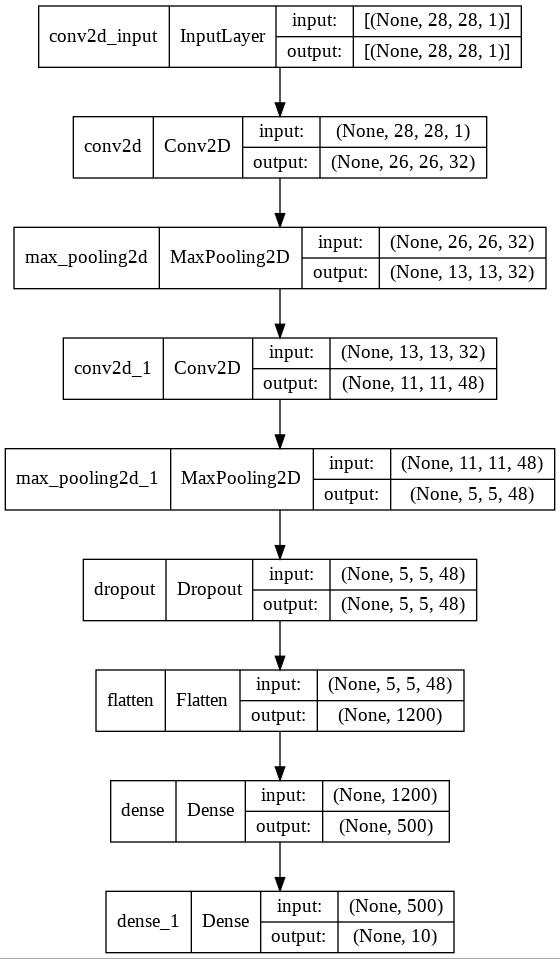

In [ ]:
plot_model(model, 'model.jpg', show_shapes=True)

#### Training the Model:

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
x = model.fit(x_train, y_train, epochs = 10, batch_size = 128, verbose = 2, validation_split = 0.1)

Epoch 1/10
422/422 - 58s - loss: 0.2370 - accuracy: 0.9280 - val_loss: 0.0614 - val_accuracy: 0.9818 - 58s/epoch - 137ms/step
Epoch 2/10
422/422 - 58s - loss: 0.0847 - accuracy: 0.9737 - val_loss: 0.0542 - val_accuracy: 0.9863 - 58s/epoch - 138ms/step
Epoch 3/10
422/422 - 56s - loss: 0.0622 - accuracy: 0.9802 - val_loss: 0.0361 - val_accuracy: 0.9887 - 56s/epoch - 132ms/step
Epoch 4/10
422/422 - 56s - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0316 - val_accuracy: 0.9905 - 56s/epoch - 134ms/step
Epoch 5/10
422/422 - 49s - loss: 0.0426 - accuracy: 0.9859 - val_loss: 0.0286 - val_accuracy: 0.9923 - 49s/epoch - 116ms/step
Epoch 6/10
422/422 - 36s - loss: 0.0377 - accuracy: 0.9874 - val_loss: 0.0267 - val_accuracy: 0.9927 - 36s/epoch - 85ms/step
Epoch 7/10
422/422 - 36s - loss: 0.0330 - accuracy: 0.9890 - val_loss: 0.0251 - val_accuracy: 0.9930 - 36s/epoch - 85ms/step
Epoch 8/10
422/422 - 36s - loss: 0.0301 - accuracy: 0.9898 - val_loss: 0.0265 - val_accuracy: 0.9940 - 36s/epoch - 86ms/

In [ ]:
# Checking accuracy
loss, accuracy = model.evaluate(x_test, y_test, verbose = 0)
print(f'Accuracy:', {accuracy*100})

Accuracy: {99.26999807357788}


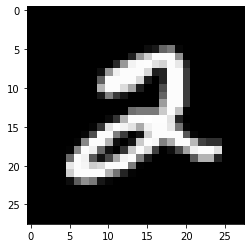

In [ ]:
# Predection
image = x_train[5]
plt.imshow(np.squeeze(image),cmap ='gray')
plt.show()

In [ ]:
image = image.reshape(1,image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

Predicted: 2
